In [1]:
from scrinet.sample import sample_helpers

In [2]:
def setup_surrogate(user="sk"):
    if user == "sk":
#         rootdir = "/Users/spx8sk/work/data/scrinet/3D_NP"
        rootdir = "/Users/spx8sk/work/data/scrinet/ann-sur-final-model"
    elif user == "rg":
        rootdir = '/Users/Rhys/Documents/PhD/PE/NN_for_PE/3D_NP'
        
    amp_basis = os.path.join(rootdir, "amp_eim_basis.npy")
    amp_model_dir = os.path.join(rootdir, "results_4_320_relu_Adam")

    phase_basis = os.path.join(rootdir, "phase_eim_basis.npy")
    phase_model_dir = os.path.join(rootdir, "results_4_320_softplus_Adamax")

    amp_model, amp_basis = load_model(
        basis_file=amp_basis,
        nn_weights_file=os.path.join(amp_model_dir, "model.h5"),
        X_scalers_file=os.path.join(amp_model_dir, "X_scalers.npy"),
        Y_scalers_file=""
    )

    phase_model, phase_basis = load_model(
        basis_file=phase_basis,
        nn_weights_file=os.path.join(phase_model_dir, "model.h5"),
        X_scalers_file=os.path.join(phase_model_dir, "X_scalers.npy"),
        Y_scalers_file=os.path.join(phase_model_dir, "y_scalers.npy")
    )
    
    amp_basis = tf.convert_to_tensor(amp_basis, dtype = tf.float32)
    phase_basis = tf.convert_to_tensor(phase_basis, dtype = tf.float32)
    
    return amp_model, amp_basis, phase_model, phase_basis

In [3]:
import os
from scrinet.workflow.pipe_utils import load_model
import tensorflow as tf
amp_model, amp_basis, phase_model, phase_basis = setup_surrogate(user="sk")

In [4]:
import numpy as np

In [5]:
# x = tf.constant([
#     [1,0,0],
#     [2,0,0]
# ], dtype=np.float32)
# theta = tf.constant([[np.pi/3], [np.pi/2]])
# phi = tf.constant([[0.], [np.pi/2]])
# mtot = tf.constant([[60.], [80.]])
# dist = tf.constant([[1.],[2.]])
# phase_shift = tf.constant([[1.],[2.]])


x = tf.constant([
    [1,-1,-1],
    [1,0,0],
    [1,1,1]
], dtype=np.float32)
theta = tf.constant([[np.pi/3], [np.pi/2], [np.pi/3]])
phi = tf.constant([[0.], [np.pi/2], [np.pi/8]])
mtot = tf.constant([[60.], [60.], [120.]])
dist = tf.constant([[2.3],[2.3],[2.3]])
phase_shift = tf.constant([[1.],[2.],[-1.23]])


f_lower = 20.


seglen = 4.
# seglen = 8.

sample_rate = 2048.*2


In [6]:
# # f_lower and sample-rate should always be constant and so can just be scalars (0-D Tensor)
surr_times_sec, hplus, hcross, unrolled_peak_time = sample_helpers.generate_surrogate_hp_hc(
    x=x,
    f_lower=f_lower,
    seglen=seglen,
    sample_rate=sample_rate,
    theta=theta,
    phi=phi,
    mtot=mtot,
    dist=dist,
    phase_shift=phase_shift,
    amp_model=amp_model,
    amp_basis=amp_basis,
    phase_model=phase_model,
    phase_basis=phase_basis
)

In [8]:
import matplotlib.pyplot as plt

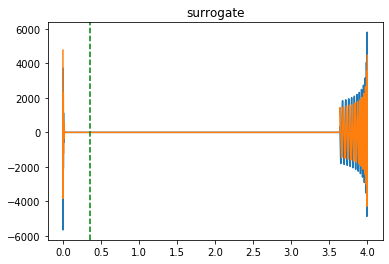

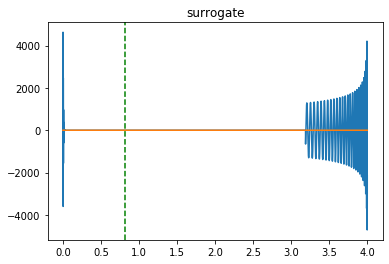

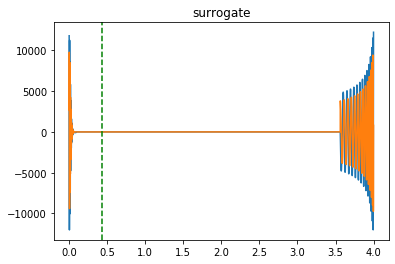

In [9]:
for i in range(hplus.shape[0]):
    plt.figure()
    plt.plot(surr_times_sec, hplus[i])
    plt.plot(surr_times_sec, hcross[i])
    plt.title("surrogate")
    
    plt.axvline(unrolled_peak_time[i], c='g', ls='--')
#     plt.xlim(unrolled_peak_time[i]-0.1 , unrolled_peak_time[i]+0.1)
#     plt.xlim(0, seglen)
#     plt.xlim(0, 0.2)
    plt.show()
    plt.close()